In [1]:
#Librerias generales
import pandas as pd
import numpy as np

#Librerias para gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Creación de app
import streamlit as st

In [2]:
# Configurar visualizaciones
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [3]:
#importar datos
import csv

df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/upgrade-hub-marketing-analysis/Preprocesamiento/pre-marketing.csv', sep=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)


In [4]:
#observamos datos
df.head()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_days,beneficio_neto,budget_cat,revenue_cat,roi_cat
0,Public-key multi-tasking throughput,2023-04-01 00:00:00+00:00,2024-02-23 00:00:00+00:00,8082.30,8679.60,email,B2B,organic,0.40,709593.48,328.0,701511.18,Bajo,Alto,NaN
1,De-engineered analyzing task-force,2023-02-15 00:00:00+00:00,2024-04-22 00:00:00+00:00,17712.98,2816.56,email,B2C,promotion,0.66,516609.10,432.0,498896.12,Medio,Alto,Alto
2,Balanced solution-oriented Local Area Network,2022-12-20 00:00:00+00:00,2023-10-11 00:00:00+00:00,84643.10,441.36,podcast,B2B,paid,0.28,458227.42,295.0,373584.32,Medio,Alto,Medio
3,Distributed real-time methodology,2022-09-26 00:00:00+00:00,2023-09-27 00:00:00+00:00,14589.75,516.59,webinar,B2B,organic,0.19,89958.73,366.0,75368.98,Medio,Medio,Medio
4,Front-line executive infrastructure,2023-07-07 00:00:00+00:00,2024-05-15 00:00:00+00:00,39291.90,20.92,social media,B2B,promotion,0.81,47511.35,313.0,8219.45,Medio,Medio,Medio


#### Cálculos genéricos

In [5]:
#calculo de medias
inversión = df['budget']
round(np.mean(inversión), 2)


np.float64(59226.41)

In [6]:
round(np.mean(df['roi']), 2)

np.float64(2474.69)

In [7]:
ganancia = df['revenue']
round(np.mean(ganancia),2) 

np.float64(513337.78)

In [8]:
round(np.mean(df['beneficio_neto']),2) # media

np.float64(454121.21)

In [9]:
#cálculo desviación tipica
round(np.std(inversión),2)


np.float64(313192.46)

In [10]:
round(np.std(df['roi']), 2)


np.float64(6109.64)

In [11]:
round(np.std(ganancia),2)


np.float64(287065.65)

In [12]:
round(np.std(df['beneficio_neto']),2)

np.float64(435730.35)

#### Generación de gráficas para tener vision general de los datos

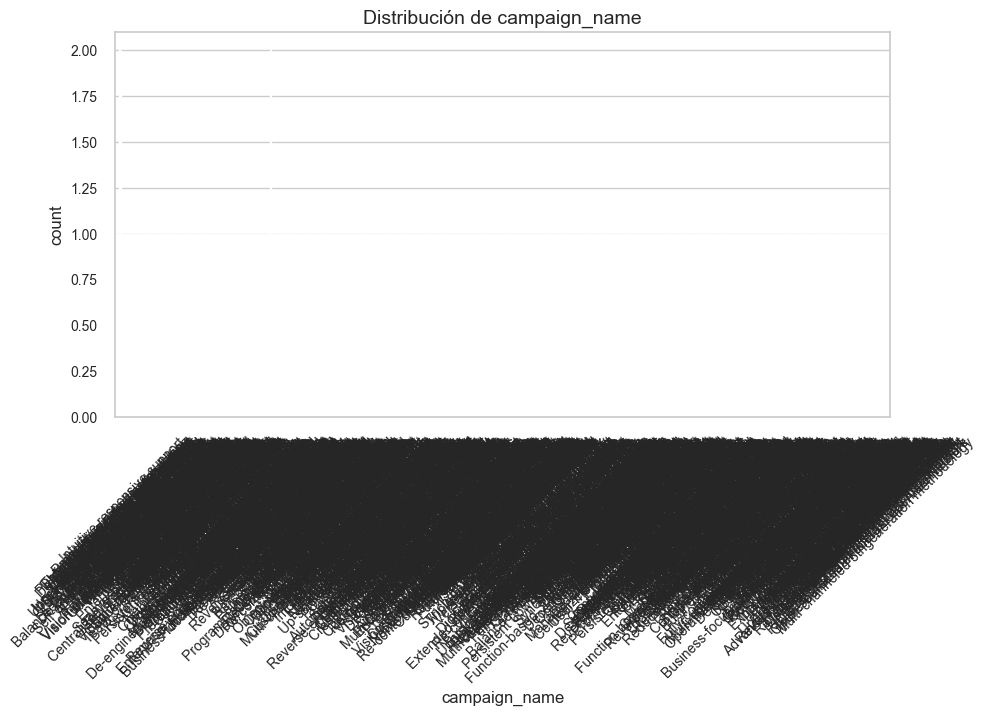

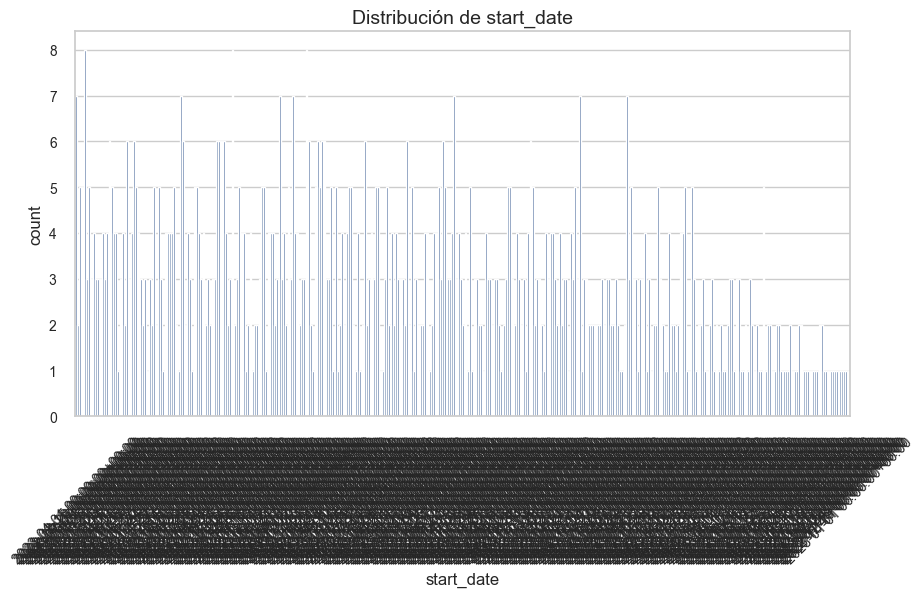

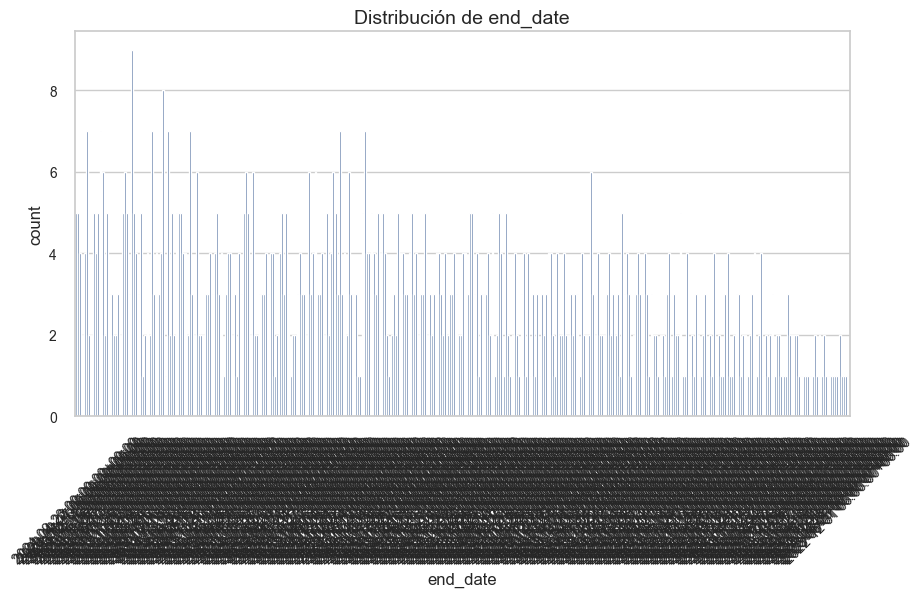

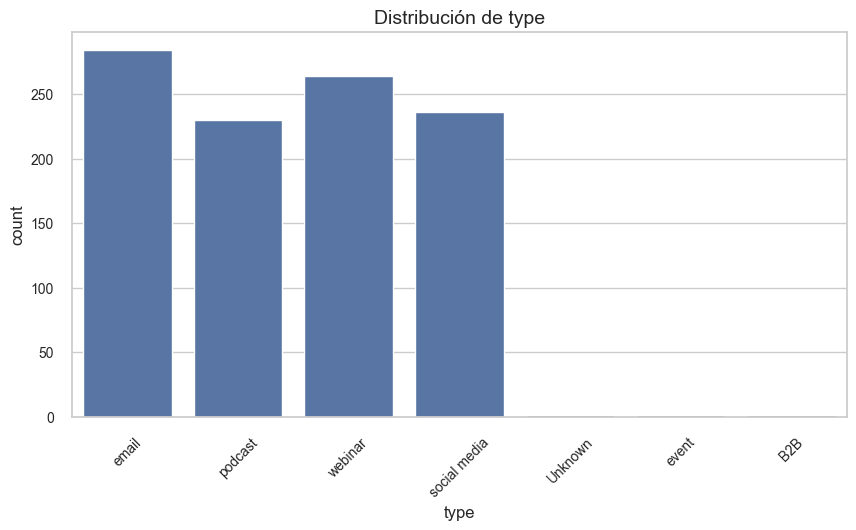

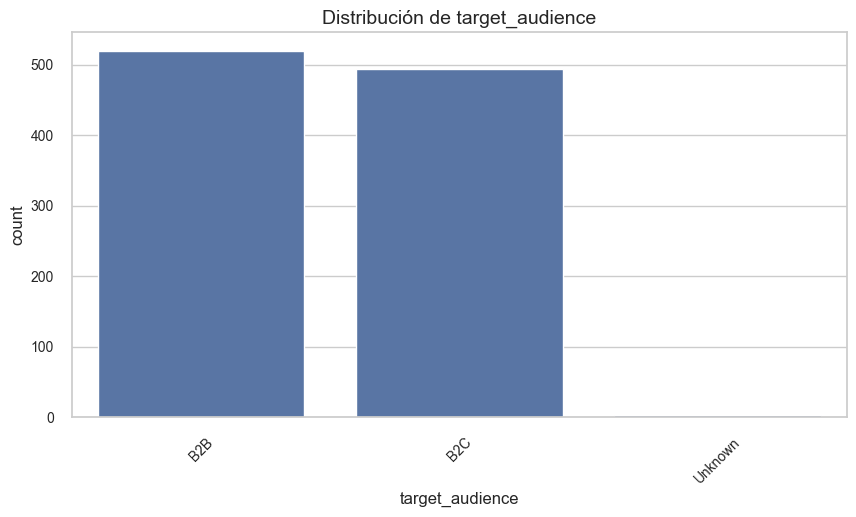

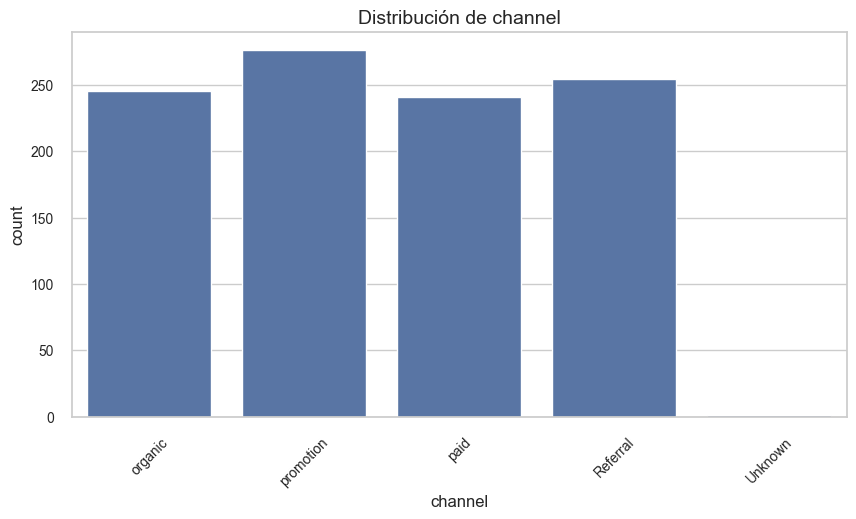

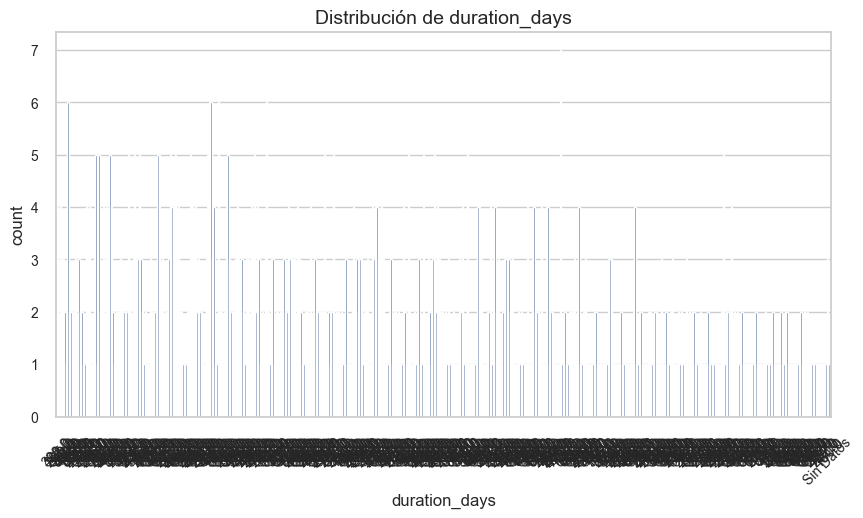

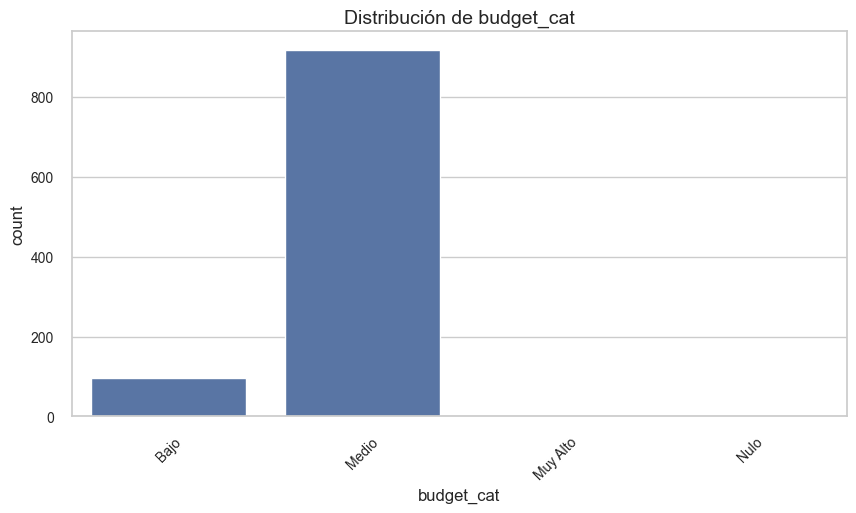

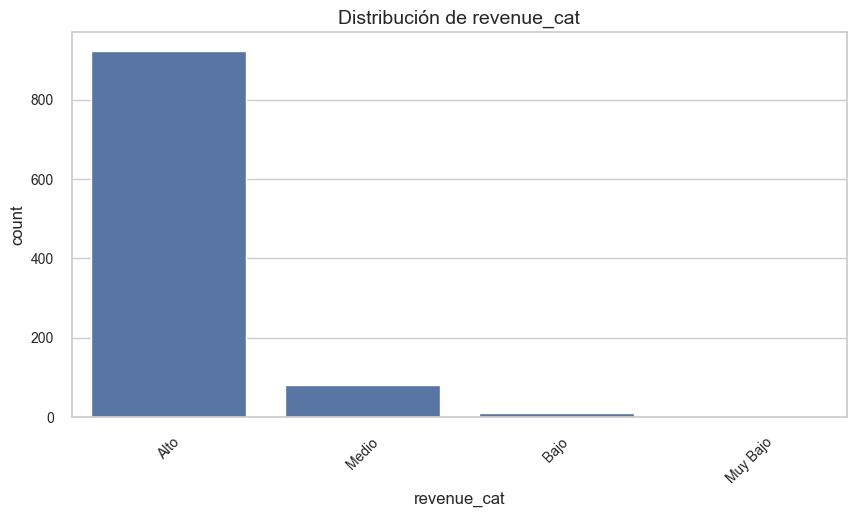

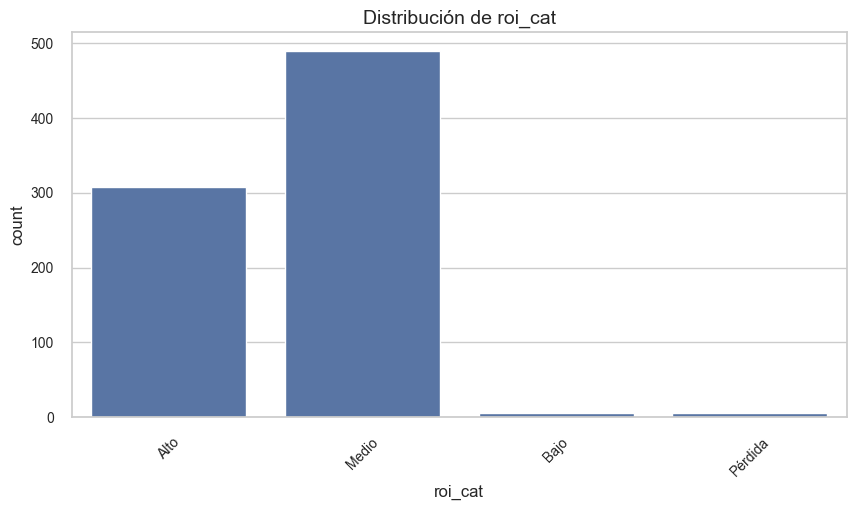

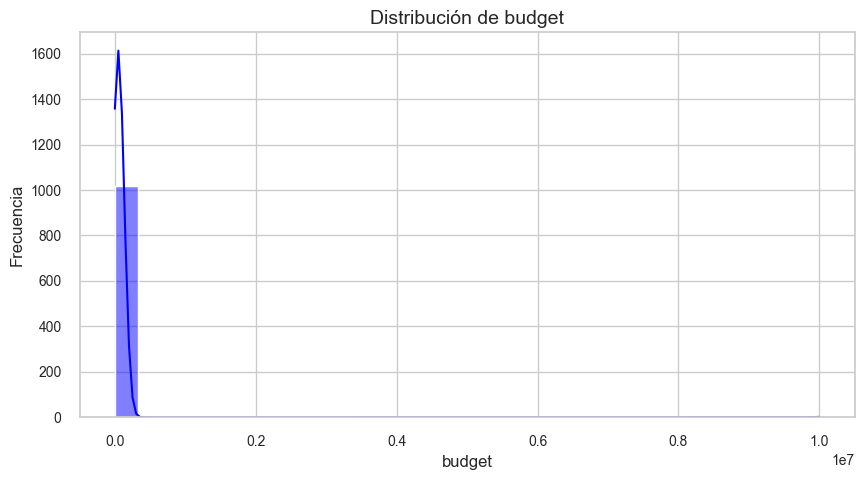

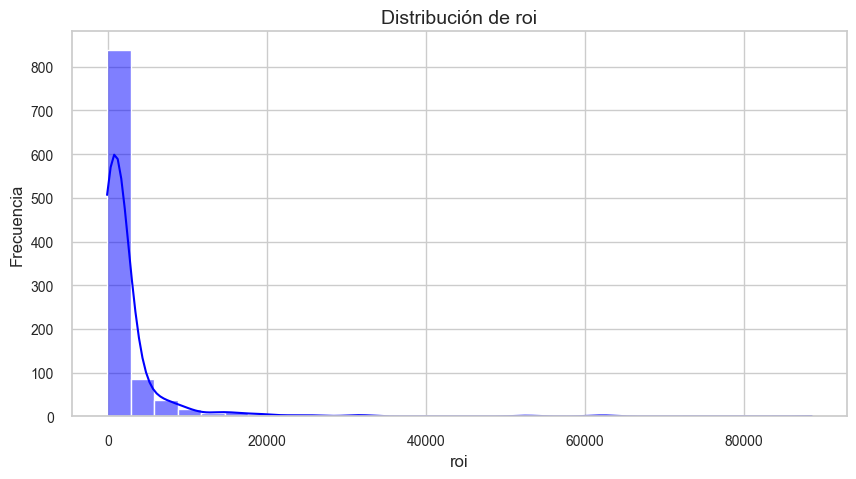

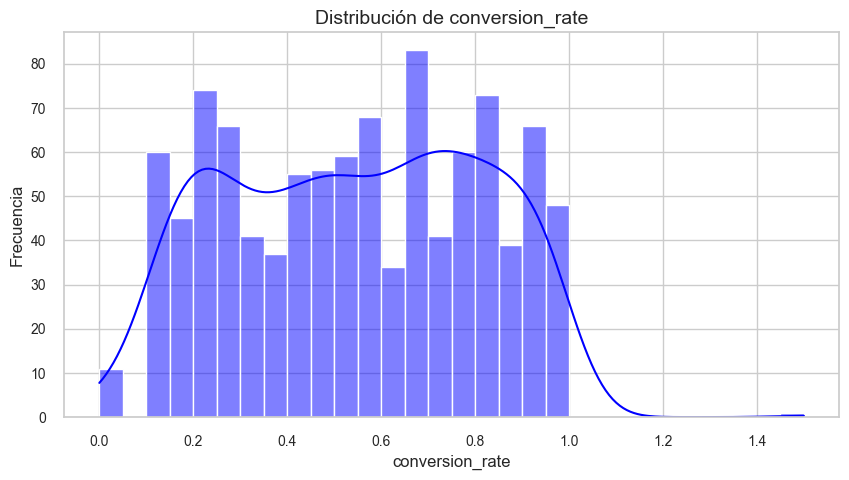

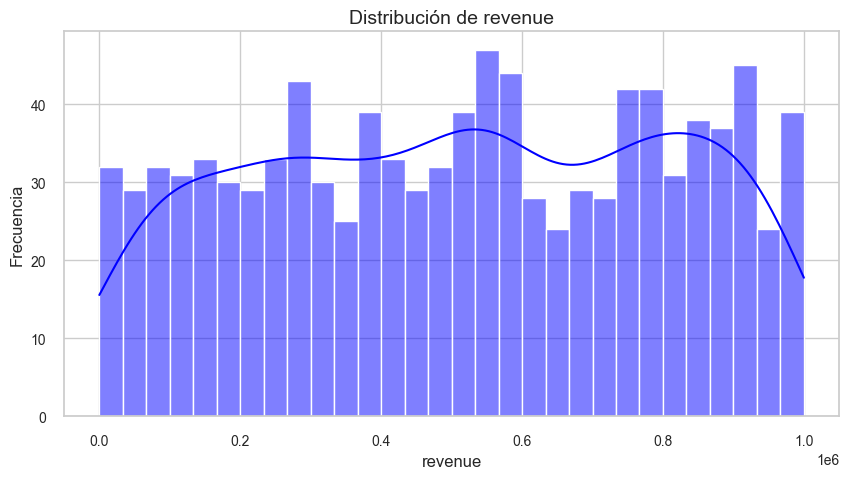

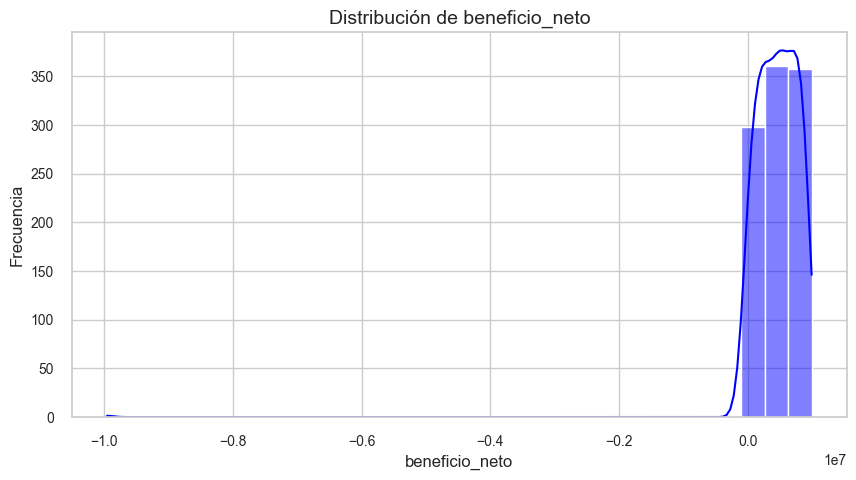

In [20]:
#Gráficas para obtener una visión general de los datos para entenderlos y extraer conclusiones

def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

#### Análisis campañas

In [14]:
#porcentaje de campañas B2B
b2b = round(df[df['target_audience'] == 'B2B'].shape[0] / df.shape[0] * 100,2)
b2b


51.13

In [15]:
#porcentaje campañas B2C
b2c = round(df[df['target_audience'] == 'B2C'].shape[0] / df.shape[0] * 100,2)
b2c

48.57

In [16]:
# Calcular porcentaje de gasto por canal
porcentaje_gasto = (
    df.groupby('channel')['budget'].sum().reset_index(name='Gasto')
)
porcentaje_gasto['Porcentaje de Gasto'] = 100 * porcentaje_gasto['Gasto'] / porcentaje_gasto['Gasto'].sum()
porcentaje_gasto = porcentaje_gasto.rename(columns={'channel': 'Canal'})

colores_canales = {
    'Referral': '#636EFA',
    'Unknown': '#EF553B',
    'organic': '#00CC96',
    'paid': '#AB63FA',
    'promotion': '#FFA15A'
}

#gráfico pie de porcentaje de ganancia por canal
fig = px.pie(
    porcentaje_gasto,
    values='Porcentaje de Gasto',
    names='Canal',
    title='Distribución de la Gasto por Canal',
    color='Canal',
    color_discrete_map=colores_canales
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución de la Gasto por Canal', title_x=0.5)
fig.show()


In [17]:
#cálculo porcentaje de ganancia
porcentaje_ganancia = (
    df.groupby('channel')['revenue'].sum().reset_index(name='Ganancia')
)
porcentaje_ganancia['Porcentaje de Ganancia'] = 100 * porcentaje_ganancia['Ganancia'] / porcentaje_ganancia['Ganancia'].sum()

#gráfico pie de porcentaje de ganancia por tipo de campaña
fig = px.pie(
    porcentaje_ganancia,
    values='Porcentaje de Ganancia',
    names='channel',
    title='Distribución de la Ganancia por Canal',
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución de la Ganancia por Canal', title_x=0.5)
fig.show()


In [18]:
#canal de marketing más usado
canal_mas_usado = df['channel'].value_counts().idxmax()
canal_mas_usado

'promotion'

In [19]:
# Calcular porcentaje de gasto por tipo de campaña
porcentaje_gasto_campañas = (
    df.groupby('type')['budget'].sum().reset_index(name='Gasto')
)
porcentaje_gasto_campañas['Porcentaje de Gasto'] = 100 * porcentaje_gasto_campañas['Gasto'] / porcentaje_gasto_campañas['Gasto'].sum()
porcentaje_gasto_campañas = porcentaje_gasto_campañas.rename(columns={'type': 'Tipo de Campaña'})

colores_campañas = {
    'social media': '#636EFA',
    'webinar': '#EF553B',
    'email': '#00CC96',
    'podcast': '#AB63FA',
    'Unknown': '#FFA15A',
    'B2B': '#FFA15A',
    'event': '#FFA15A'
}

fig = px.pie(
    porcentaje_gasto_type,
    values='Porcentaje de Gasto',
    names='Tipo de Campaña',
    title='Distribución de la Gasto por Tipo de campaña',
    color='Tipo de Campaña',
    color_discrete_map=colores_campañas
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución de la Gasto por Tipo campaña', title_x=0.5)
fig.show()


NameError: name 'porcentaje_gasto_type' is not defined

In [ ]:
#cálculo porcentaje de ganancia por tipo de campaña
porcentaje_ganancia_campaña = (
    df.groupby('type')['revenue'].sum().reset_index(name='Ganancia')
)
porcentaje_ganancia_campaña['Porcentaje de Ganancia'] = 100 * porcentaje_ganancia_campaña['Ganancia'] / porcentaje_ganancia_campaña['Ganancia'].sum()

#gráfico pie de porcentaje de ganancia por tipo de campaña
fig = px.pie(
    porcentaje_ganancia_campaña,
    values='Porcentaje de Ganancia',
    names='type',
    title='Distribución de la Ganancia por Canal',
    color='type',
    color_discrete_map=colores_campañas
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribución de la Ganancia por Tipo de Campaña', title_x=0.5)
fig.show()

In [ ]:
#gráfica de barras que muestre el uso de los diferentes tipos de campaña
fig = px.bar(
    df['type'].value_counts().reset_index(),
    x='count',
    y='type',
    title='Uso de tipos de campañas',
    labels={'index': 'type', 'type': 'Número de Campañas'},
    color='type',
    color_discrete_map=colores_campañas
)
fig.update_layout(title_text='Uso de Tipos de campaña', title_x=0.5)
fig.show()

In [ ]:
#gráfica de barras que muestre el uso de los canales de marketing
fig = px.bar(
    df['channel'].value_counts().reset_index(),
    x='count',
    y='channel',
    title='Uso de los Canales de Marketing',
    labels={'index': 'Canal', 'channel': 'Número de Campañas'},
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='Uso de los Canales de Marketing', title_x=0.5)
fig.show()

In [ ]:
#tipo de campaña con mejor conversión
tipo_mejor_conversion = df.groupby('type')['conversion_rate'].mean().idxmax()
tipo_mejor_conversion


'webinar'

In [ ]:
#comprobar que tipo de campaña genera más ingresos
tipo_mayor_ingresos = df.groupby('type')['revenue'].sum().idxmax()
tipo_mayor_ingresos

'email'

In [ ]:
#crear una gráfica que muestre los ingresos por tipo de campaña
fig = px.bar(
    df.groupby('type')['revenue'].sum().reset_index(),
    x='type',
    y='revenue',
    title='Ingresos por Tipo de Campaña',
    color='type',
    color_discrete_map=colores_campañas
)
fig.update_layout(title_text='Ingresos por Tipo de Campaña', title_x=0.5)

In [ ]:
#crear una gráfica que muestre los ingresos por canal

fig = px.bar(
    df.groupby('channel')['revenue'].sum().reset_index(),
    x='channel',
    y='revenue',
    title='Ingresos por Canal',
    color='channel',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='Ingresos Canal', title_x=0.5)
fig.show()

In [ ]:
##gráfica que muestre el roi por tipo de campaña
fig = px.bar(
    df.groupby('type')['roi'].mean().reset_index(),
    x='type',
    y='roi',
    title='ROI por Tipo de Campaña',
    color='type',
    color_discrete_map=colores_tipos
)
fig.update_layout(title_text='ROI por Tipo de Campaña', title_x=0.5)
fig.show()

In [ ]:
fig = px.bar(
    df.groupby('channel')['roi'].mean().reset_index(),
    x='channel',
    y='roi',
    color='channel',
    title='ROI Medio por Canal',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='ROI Medio por Canal', title_x=0.5)
fig.show()


In [ ]:
#gráfica boxplot que muestre el conversión rate por canal
fig = px.box(
    df,
    x='channel',
    y='conversion_rate',
    color='channel',
    title='Distribución de la Tasa de Conversión por Canal',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='Distribución de la Tasa de Conversión por Canal', title_x=0.5)
fig.show()

In [ ]:
#Tipo de campaña con más ingresos de promedio
tipo_mayor_ingresos_promedio = df.groupby('type')['revenue'].mean().idxmax()
tipo_mayor_ingresos_promedio


'social media'

In [ ]:
#Roi por Target
colores_target = {
    'B2B': '#1f77b4',  # azul
    'B2C': '#ff7f0e'   # naranja
}

fig = px.violin(
    df,
    x='target_audience',
    y='roi',
    color='target_audience',
    box=True,
    points='all',
    title='Distribución del ROI por Audiencia Objetivo',
    labels={'target_audience': 'Audiencia Objetivo', 'roi': 'ROI'},
    color_discrete_map=colores_target
)
fig.show()


In [ ]:
#Gráfica que muestre Diferencia de tasa de conversión según target

colores_target = {
    'B2B': '#1f77b4',  # azul
    'B2C': '#ff7f0e'   # naranja
}

fig = px.box(
    df,
    x='target_audience',
    y='conversion_rate',
    color='target_audience',
    title='Distribución de la Tasa de Conversión por Audiencia Objetivo',
    labels={'target_audience': 'Audiencia Objetivo', 'conversion_rate': 'Tasa de Conversión'},
    color_discrete_map=colores_target
)
fig.update_layout(title_text='Distribución de la Tasa de Conversión por Audiencia Objetivo', title_x=0.5)
fig.show()


In [ ]:
#Calcular la campaña con mayor beneficio neto
campaña_mayor_beneficio = df.loc[df['beneficio_neto'].idxmax(), 'channel']
campaña_mayor_beneficio


'organic'

In [ ]:
df['beneficio_neto']


0       701511.180
1       498896.120
2       373584.320
3        75368.980
4         8219.450
           ...    
1012    440447.588
1013    200000.000
1014      2801.480
1015     30000.000
1016     80000.000
Name: beneficio_neto, Length: 1017, dtype: float64

In [ ]:
# Gráfica de barras que muestre el beneficio neto medio por canal
fig = px.bar(
    df.groupby('channel')['beneficio_neto'].mean().reset_index(),
    x='channel',
    y='beneficio_neto',
    color='channel',
    title='Beneficio Neto Medio por Canal',
    color_discrete_map=colores_canales
)
fig.update_layout(title_text='Beneficio Neto Medio por Canal', title_x=0.5)
fig.show()


In [ ]:
#gráfica que muestre el beneficio neto por tipo de campaña
fig = px.bar(
    df.groupby('type')['beneficio_neto'].sum().reset_index(),
    x='type',
    y='beneficio_neto',
    title='Beneficio Neto por Tipo de Campaña',
    color='type',
    color_discrete_map=colores_tipos
)
fig.update_layout(title_text='Beneficio Neto por Tipo de Campaña', title_x=0.5)
fig.show()

In [ ]:
#Relación entre Gasto y Ganancia por Canal

# Añadir jitter al eje x para dispersar los puntos
np.random.seed(42)
jitter = np.random.normal(0, df['budget'].std() * 0.05, size=len(df))
x = df['budget'] + jitter
y = df['revenue']

# Ajustar una regresión lineal en escala logarítmica
mask = (x > 0) & (y > 0)
coef = np.polyfit(np.log10(x[mask]), np.log10(y[mask]), 1)
poly1d_fn = np.poly1d(coef)

# Valores para la línea de correlación
x_vals = np.linspace(x[mask].min(), x[mask].max(), 100)
y_vals = 10 ** poly1d_fn(np.log10(x_vals))

fig = px.scatter(
    df,
    x=x,
    y='revenue',
    color='channel',
    size='revenue',
    size_max=40,
    title='Relación entre Gasto y Ganancia por Canal',
    labels={'budget': 'Gasto', 'revenue': 'Ganancia'},
    color_discrete_map=colores_canales,
    log_x=True,
    log_y=True
)

# Añadir línea de correlación
fig.add_traces(
    go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='lines',
        name='Línea de correlación',
        line=dict(color='black', dash='dash')
    )
)

fig.update_layout(title_text='Relación entre Gasto y Ganancia por Canal (Escala Logarítmica)', title_x=0.5)
fig.show()

In [ ]:
df['budget']

0         8082.30
1        17712.98
2        84643.10
3        14589.75
4        39291.90
          ...    
1012     20000.00
1013    100000.00
1014     47198.52
1015     60000.00
1016     40000.00
Name: budget, Length: 1017, dtype: float64

In [ ]:
# Relación entre gasto y ganancia por canal
fig = px.scatter(
    df,
    x="budget",
    y="roi",
    color="channel",
    size="revenue",
    hover_data=['campaign_name'],
    color_discrete_map=colores_canales,
    title="Relación entre Gasto y ROI por Canal",
    labels={"budget": "Gasto", "roi": "ROI", "channel": "Canal"},
    log_x=True
)
fig.update_layout(
    title_text='Relación entre Gasto y ROI por Canal',
    title_x=0.5,
    xaxis_title="Gasto (escala log)",
    yaxis_title="ROI",
    legend_title="Canal",
    hovermode="closest"
)
fig.show()


In [ ]:
#Relación entre gasto y ganancia por tipo de campaña
fig = px.scatter(
    df,
    x="budget",
    y="roi",
    color="type",
    size="revenue",
    hover_data=['campaign_name'],
    color_discrete_map= colores_campañas,
    title="Relación entre Gasto y ROI por Tipo de Campaña",
    labels={"budget": "Gasto", "roi": "ROI", "type": "Tipo de Campaña"},
    log_x=True
)
fig.update_layout(
    title_x=0.5,
    xaxis_title="Gasto (escala log)",
    yaxis_title="ROI",
    legend_title="Campaña",
    hovermode="closest"
)
fig.show()

In [ ]:
#grafica que muestre la relación entre el gasto y la ganacia según el target (escala logarítmica)
fig = px.scatter(
    df,
    x='budget',
    y='revenue',
    color='target_audience',
    size='revenue',
    size_max=40,
    title='Relación entre Gasto y Ganancia por Audiencia Objetivo (Escala Logarítmica)',
    labels={'budget': 'Gasto', 'revenue': 'Ganancia'},
    color_discrete_map=colores_target,
    log_x=True,
    log_y=True
)
fig.update_layout(title_text='Relación entre Gasto y Ganancia por Audiencia Objetivo (Escala Logarítmica)', title_x=0.5)
fig.show()

In [ ]:
# Relación entre el gasto y la tasa de conversión según el target (escala logarítmica)
fig = px.scatter(
    df,
    x='budget',
    y='conversion_rate',
    color='target_audience',
    size='conversion_rate',
    size_max=40,
    title='Relación entre Gasto y Tasa de Conversión por Audiencia Objetivo (Escala Logarítmica)',
    labels={'budget': 'Gasto', 'conversion_rate': 'Tasa de Conversión'},
    color_discrete_map=colores_target,
    log_x=True
)
fig.update_layout(title_text='Relación entre Gasto y Tasa de Conversión por Audiencia Objetivo (Escala Logarítmica)', title_x=0.5)
fig.show()

In [ ]:
df_sin_outlier = df[df['budget'] != df['budget'].max()]
# Relación entre el gasto y la tasa de conversión según el target (sin outlier)
fig = px.scatter(
    df_sin_outlier,
    x='type',
    y='channel',
    color='roi',
    size='budget',
    size_max=40,
    title='Relación del roi por Tipo de Campaña y Canal (sin outlier)',
    labels={'type': 'Campaña', 'channel': 'Canal'},
    color_continuous_scale='Viridis',
    range_color=[df_sin_outlier['roi'].min(), df_sin_outlier['roi'].max()]
)
fig.update_traces(marker=dict(opacity=0.5))
fig.show()

In [ ]:
fig = px.violin(
    df_sin_outlier,
    x='type',
    y='roi',
    color='channel',
    box=True,
    points='all',
    title='Distribución del ROI por Tipo de Campaña y Canal (sin outlier)',
    labels={'type': 'Tipo de Campaña', 'roi': 'ROI', 'channel': 'Canal'},
    color_discrete_map=colores_canales
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.violin(
    df_sin_outlier,
    x='type',
    y='conversion_rate',
    color='channel',
    box=True,
    points='all',
    title='Distribución de la Conversión por Tipo de Campaña y Canal (sin outlier)',
    labels={'type': 'Tipo de Campaña', 'conversion_rate': 'Tasa de Conversión', 'channel': 'Canal'},
    color_discrete_map=colores_canales
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(
    df_sin_outlier,
    x='type',
    y='budget',
    color='channel',
    box=True,
    points='all',
    title='Distribución del gasto por Tipo de Campaña y Canal (sin outlier)',
    labels={'type': 'Tipo de Campaña', 'budget': 'Gasto', 'channel': 'Canal'},
    color_discrete_map=colores_canales
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df_sin_outlier['budget'],
    name='Gasto',
    opacity=0.6,
    marker_color='#636EFA'  # azul, como en 'organic'
))
fig.add_trace(go.Histogram(
    x=df_sin_outlier['revenue'],
    name='Ganancia',
    opacity=0.6,
    marker_color='#EF553B'  # naranja, como en 'promotion'
))
fig.add_trace(go.Histogram(
    x=df_sin_outlier['roi'],
    name='ROI',
    opacity=0.6,
    marker_color='#00CC96'  # verde, como en 'paid'
))

fig.update_layout(
    barmode='overlay',
    title='Comparación de Gasto, Ganancia y ROI',
    xaxis_title='Valor',
    yaxis_title='Frecuencia'
)
fig.show()


In [ ]:
fig = px.violin(
    df_sin_outlier,
    x='type',
    y='revenue',
    color='channel',
    box=True,
    points='all',
    title='Distribución de la ganancia por Tipo de Campaña y Canal (sin outlier)',
    labels={'type': 'Tipo de Campaña', 'revenue': 'Ganancia', 'channel': 'Canal'},
    color_discrete_map=colores_canales
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
#Porcentaje de roi por target
porcentaje_roi = (
    df.groupby('target_audience')['roi'].sum().reset_index(name='ROI')
)
porcentaje_roi['Porcentaje de ROI'] = 100 * porcentaje_roi['ROI'] / porcentaje_roi['ROI'].sum()
porcentaje_roi = porcentaje_roi.rename(columns={'target_audience': 'Audiencia Objetivo'})
porcentaje_roi


,Audiencia Objetivo,ROI,Porcentaje de ROI
0,B2B,1.273183e+06,50.588142
1,B2C,1.240858e+06,49.303762
2,Unknown,2.720511e+03,0.108096


In [ ]:
#Beneficio neto medio por target
beneficio_neto_medio = (
    df.groupby('target_audience')['beneficio_neto'].mean().reset_index(name='Beneficio Neto Medio')
)
beneficio_neto_medio['Beneficio Neto Medio'] = 100 * beneficio_neto_medio['Beneficio Neto Medio'] / beneficio_neto_medio['Beneficio Neto Medio'].sum()
beneficio_neto_medio = beneficio_neto_medio.rename(columns={'target_audience': 'Audiencia Objetivo'})
beneficio_neto_medio

,Audiencia Objetivo,Beneficio Neto Medio
0,B2B,39.755033
1,B2C,40.272101
2,Unknown,19.972866


In [ ]:
# Contar el número de campañas con ROI mayor a 0.5
num_campañas_roi_mayor_05 = campañas_roi_mayor_05.shape[0]
num_campañas_roi_mayor_05

974

In [ ]:
#Cuenta el numero de campañas con ingresos mayores a 500.000
campañas_ingresos_mayores_500k = df[df['revenue'] > 500000]
num_campañas_ingresos_mayores_500k = campañas_ingresos_mayores_500k.shape[0]
num_campañas_ingresos_mayores_500k



537

In [ ]:
#Contabilizar campñas con roi mayor a 0.5 y ingresos mayores a 500.000
campañas_roi_ingresos = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]
num_campañas_roi_ingresos = campañas_roi_ingresos.shape[0]
num_campañas_roi_ingresos    

537

In [ ]:
#Arreglar fechas para poder graficar
df['month'] = pd.to_datetime(df['start_date']).dt.month
df['year'] = pd.to_datetime(df['start_date']).dt.year
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m')
df['month_year'] = df['month_year'].dt.strftime('%Y-%m')

#Gráfica que muestre el beneficio neto medio por meses
fig = px.line(
    df.groupby('month_year')['beneficio_neto'].mean().reset_index(),
    x='month_year',
    y='beneficio_neto',
    title='Beneficio Neto Medio por Meses',
    labels={'month_year': 'Mes', 'beneficio_neto': 'Beneficio Neto Medio'},
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(title_text='Beneficio Neto Medio por Meses', title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()



In [ ]:
#Gráfica que muestre el roi medio por meses
fig = px.line(
    df.groupby('month_year')['roi'].mean().reset_index(),
    x='month_year',
    y='roi',
    title='ROI Medio por Meses',
    labels={'month_year': 'Mes', 'roi': 'ROI Medio'},
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(title_text='ROI Medio por Meses', title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
#Gráfica que muestre el budget medio por meses
fig = px.line(
    df.groupby('month_year')['budget'].mean().reset_index(),
    x='month_year',
    y='budget',
    title='Gasto Medio por Meses',
    labels={'month_year': 'Mes', 'budget': 'Gasto Medio'},
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(title_text='Gasto Medio por Meses', title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()


In [ ]:
#Gráfica que muestre el conversion_rate medio por meses
fig = px.line(
    df.groupby('month_year')['conversion_rate'].mean().reset_index(),
    x='month_year',
    y='conversion_rate',
    title='Tasa de Conversión Media por Meses',
    labels={'month_year': 'Mes', 'conversion_rate': 'Tasa de Conversión Media'},
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(title_text='Tasa de Conversión Media por Meses', title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()

<Axes: >

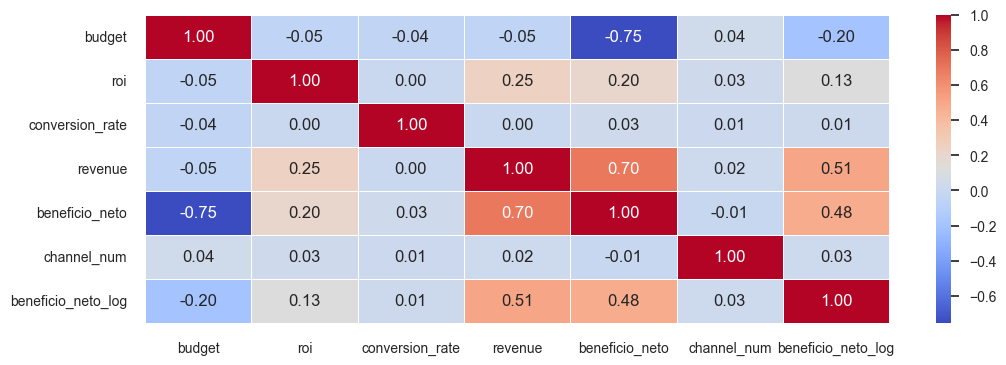

In [ ]:
var_num = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[var_num].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
#Calcular la campaigne_name con más budget
campaña_mayor_budget = df.loc[df['budget'].idxmax(), 'campaign_name']
campaña_mayor_budget

'Outlier Budget'

In [ ]:
fila = df[df['campaign_name'] == 'Outlier Budget']
print(fila)


       campaign_name                 start_date                   end_date  \
1005  Outlier Budget  2023-07-01 00:00:00+00:00  2024-03-01 00:00:00+00:00   

         budget   roi   type target_audience    channel  conversion_rate  \
1005  9999999.0 -99.5  email             B2B  promotion              0.2   

      revenue duration_days  beneficio_neto budget_cat revenue_cat roi_cat  \
1005  50000.0         244.0      -9949999.0   Muy Alto       Medio     NaN   

      channel_num  beneficio_neto_log  month  year month_year  
1005            4          -16.113083      7  2023    2023-07  


In [ ]:
#campaigne_name con más revenue
campaña_mayor_revenue = df.loc[df['revenue'].idxmax(), 'campaign_name']
campaña_mayor_revenue

'Realigned radical hardware'

In [ ]:
fila = df[df['campaign_name'] == 'Realigned radical hardware']
print(fila)

                  campaign_name                 start_date  \
170  Realigned radical hardware  2022-11-03 00:00:00+00:00   

                      end_date    budget      roi     type target_audience  \
170  2024-07-12 00:00:00+00:00  34512.86  2796.64  webinar             B2B   

      channel  conversion_rate    revenue duration_days  beneficio_neto  \
170  Referral             0.87  999712.49         617.0       965199.63   

    budget_cat revenue_cat roi_cat  channel_num  beneficio_neto_log  month  \
170      Medio        Alto    Alto            0           13.780091     11   

     year month_year  
170  2022    2022-11  


In [ ]:
#campaigne_name con más roi
campaña_mayor_roi = df.loc[df['roi'].idxmax(), 'campaign_name']
campaña_mayor_roi

'Persevering zero administration interface'

In [ ]:
fila = df[df['campaign_name'] == 'Persevering zero administration interface']
print(fila)

                                 campaign_name                 start_date  \
252  Persevering zero administration interface  2023-03-27 00:00:00+00:00   

                      end_date   budget      roi   type target_audience  \
252  2023-10-25 00:00:00+00:00  1052.57  88475.9  email             B2C   

       channel  conversion_rate    revenue duration_days  beneficio_neto  \
252  promotion             0.44  932323.35         212.0       931270.78   

    budget_cat revenue_cat roi_cat  channel_num  beneficio_neto_log  month  \
252       Bajo        Alto     NaN            4           13.744306      3   

     year month_year  
252  2023    2023-03  


In [ ]:
#campaigne_name con más conversión
campaña_mayor_revenue = df.loc[df['conversion_rate'].idxmax(),'campaign_name']
campaña_mayor_revenue

'Too many conversions'

In [ ]:
#campaigne_name con más beneficio
campaña_mayor_revenue = df.loc[df['beneficio_neto'].idxmax(), 'campaign_name']
campaña_mayor_revenue

'Advanced systematic complexity'

In [ ]:
#encontrar campañas realizadas en julio
campañas_julio = df[df['start_date'].str.contains('2023-07')]
campañas_julio[['campaign_name', 'start_date', 'budget', 'revenue', 'roi', 'conversion_rate']]


,campaign_name,start_date,budget,revenue,roi,conversion_rate
4,Front-line executive infrastructure,2023-07-07 00:00:00+00:00,39291.90,47511.35,20.92,0.81
11,Cross-platform demand-driven encoding,2023-07-21 00:00:00+00:00,64041.37,174462.47,172.42,0.55
13,Optional actuating standardization,2023-07-04 00:00:00+00:00,14810.62,477528.27,3124.23,0.45
18,Fundamental dedicated encryption,2023-07-16 00:00:00+00:00,17573.23,460559.74,2520.80,0.79
27,Managed analyzing service-desk,2023-07-05 00:00:00+00:00,14391.98,456537.40,3072.17,0.83
...,...,...,...,...,...,...
966,Networked upward-trending forecast,2023-07-06 00:00:00+00:00,43185.33,918409.28,2026.67,0.72
975,Extended 24hour contingency,2023-07-07 00:00:00+00:00,69815.82,2810.51,-95.97,0.27
985,Reverse-engineered static infrastructure,2023-07-16 00:00:00+00:00,7315.35,162798.55,2125.44,0.70
987,Multi-channeled full-range framework,2023-07-01 00:00:00+00:00,83835.24,161707.63,92.89,0.48
